# data load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns', 35)  ## 생략 없이 한 번에 띄울 피쳐수 = 35
# df0 = pd.read_parquet( "../data/df0.parquet" )
# df1 = pd.read_parquet( "../data/df1.parquet" )  ### 추가 피쳐: 페이백율, 할인률, 종합혜택률, 구매시각추출, 구매건카운트
# df2 = pd.read_parquet( "../data/df2.parquet" )
# df3 = pd.read_parquet( "../data/df3.parquet" )  ### 추가 피쳐: 가입시각추출, 상업코드
df2 = pd.read_parquet( "../data/df2_score.parquet" )

# print(df0.shape, df1.shape, df2.shape, df3.shape, sep=" "*5)
# display(df0.head(2))
# display(df1.head(2))
# display(df2.head(2))
# display(df3.head(2))

In [2]:
## 지수 표기법 변경
np.set_printoptions(precision=6, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

## 목표
- 점수에 따라 유저군을 분리하고, 각 유저군 별 전략 선정

## 기준: 고객 점수

In [11]:
#하위 80% 상위 15% 최상위 5%로 분리
print('normal(~80%)')
df_n = df2[df2['score']<11.3]
display(df_n.describe())
print('vip(80~95%)')
df_v = df2[(df2['score']>=11.3) & (df2['score']<20.2)]
display(df_v.describe())
print('vvip(95~%)')
df_vv = df2[df2['score']>=20.2]
display(df_vv.describe())

normal(~80%)


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,score
count,436020.000,436020.000,436020.000,436020.000,436020.000,436020.000,436020.000,436020.000,436020.000,436020.000,436020.000,436020.000,436020.000,436020.000,436020.000,436020.000
mean,272389.043,36.447,0.399,0.372,0.004,100138.852,92392.376,349.562,7746.475,8096.038,0.351,13.568,13.919,1.000,4.002,7.121
std,157356.147,12.013,0.490,0.483,0.066,267449.902,258819.796,1516.444,10968.055,11157.229,0.861,13.508,13.340,0.000,4.564,1.826
min,1.000,15.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,3.200
25%,136089.500,29.000,0.000,0.000,0.000,19000.000,15900.000,0.000,2000.000,2000.000,0.000,5.900,6.400,1.000,1.000,5.700
50%,272429.500,35.000,0.000,0.000,0.000,44870.000,39690.000,0.000,5000.000,5000.000,0.000,10.100,10.400,1.000,2.000,7.200
75%,408716.250,41.000,1.000,1.000,0.000,108682.750,98920.000,0.000,9502.000,10000.000,0.000,16.800,16.800,1.000,5.000,8.400
max,544921.000,121.000,1.000,1.000,1.000,66233030.000,64744230.000,99651.000,1488800.000,1488800.000,5.000,100.000,100.000,1.000,146.000,11.300


vip(80~95%)


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,score
count,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000
mean,272749.492,37.878,0.209,0.582,0.010,470734.666,439385.528,2957.004,31349.138,34306.142,0.799,7.368,8.167,1.000,23.959,14.746
std,157319.810,9.546,0.407,0.493,0.100,903107.355,875552.800,5631.554,34496.655,34982.848,1.000,3.958,3.645,0.000,16.313,2.470
min,23.000,15.000,0.000,0.000,0.000,10000.000,7200.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,4.000,11.300
25%,136297.000,31.000,0.000,0.000,0.000,205510.500,189694.500,146.000,12841.500,15529.000,0.000,4.800,5.900,1.000,13.000,12.600
50%,272488.000,38.000,0.000,1.000,0.000,343466.000,317816.000,1382.000,24167.000,26963.000,0.400,7.100,7.700,1.000,20.000,14.300
75%,409150.000,43.000,0.000,1.000,0.000,554845.000,515586.500,3546.000,40598.500,43559.500,1.200,9.300,9.700,1.000,30.000,16.700
max,544919.000,121.000,1.000,1.000,1.000,115005350.000,112273800.000,202326.000,2731550.000,2731550.000,5.000,66.400,66.400,1.000,477.000,20.100


vvip(95~%)


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,score
count,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000
mean,272747.941,39.897,0.157,0.675,0.014,1206480.369,1131156.760,10838.370,75323.609,86161.978,0.912,6.564,7.476,1.000,70.415,23.937
std,156452.625,9.212,0.364,0.468,0.119,1033191.679,987774.092,14532.007,56418.119,63076.974,0.735,2.311,2.155,0.000,51.853,2.515
min,81.000,16.000,0.000,0.000,0.000,88367.000,82367.000,0.000,0.000,3537.000,0.000,0.000,1.400,1.000,12.000,20.200
25%,138530.750,34.000,0.000,0.000,0.000,646429.000,601901.000,3367.000,39540.500,46604.500,0.400,5.000,6.100,1.000,42.000,21.600
50%,272848.000,40.000,0.000,1.000,0.000,963722.000,898941.000,6594.000,61847.500,70543.000,0.700,6.400,7.300,1.000,58.000,23.700
75%,407051.750,46.000,0.000,1.000,0.000,1463867.000,1370278.500,12959.000,94326.000,106224.500,1.200,7.900,8.600,1.000,85.000,26.000
max,544881.000,93.000,1.000,1.000,1.000,36801930.000,35664860.000,851803.000,1150002.000,1330657.000,5.000,33.000,35.800,1.000,2705.000,28.800


## 고객 점수별 분류
- normal(df_n) = 점수 상위 80% 대 이용자 
- vip(df_v) = 점수 상위 20% 대 이용자 
- vvip(df_vv) = 점수 상위 5% 대 이용자 

# 점수별 feature 차이

## 점수 분포

/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


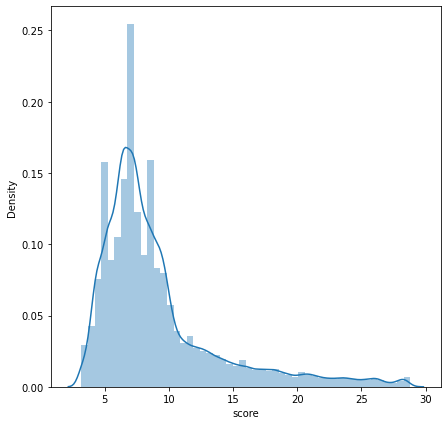

In [13]:
plt.figure(figsize=(7,7),facecolor="white")
sns.distplot(df2['score'])
plt.show()

In [37]:
display(df_v.describe())
display(df_vv.describe())

,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,score
count,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000,81567.000
mean,272749.492,37.878,0.209,0.582,0.010,470734.666,439385.528,2957.004,31349.138,34306.142,0.799,7.368,8.167,1.000,23.959,14.746
std,157319.810,9.546,0.407,0.493,0.100,903107.355,875552.800,5631.554,34496.655,34982.848,1.000,3.958,3.645,0.000,16.313,2.470
min,23.000,15.000,0.000,0.000,0.000,10000.000,7200.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,4.000,11.300
25%,136297.000,31.000,0.000,0.000,0.000,205510.500,189694.500,146.000,12841.500,15529.000,0.000,4.800,5.900,1.000,13.000,12.600
50%,272488.000,38.000,0.000,1.000,0.000,343466.000,317816.000,1382.000,24167.000,26963.000,0.400,7.100,7.700,1.000,20.000,14.300
75%,409150.000,43.000,0.000,1.000,0.000,554845.000,515586.500,3546.000,40598.500,43559.500,1.200,9.300,9.700,1.000,30.000,16.700
max,544919.000,121.000,1.000,1.000,1.000,115005350.000,112273800.000,202326.000,2731550.000,2731550.000,5.000,66.400,66.400,1.000,477.000,20.100


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,score
count,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000,27334.000
mean,272747.941,39.897,0.157,0.675,0.014,1206480.369,1131156.760,10838.370,75323.609,86161.978,0.912,6.564,7.476,1.000,70.415,23.937
std,156452.625,9.212,0.364,0.468,0.119,1033191.679,987774.092,14532.007,56418.119,63076.974,0.735,2.311,2.155,0.000,51.853,2.515
min,81.000,16.000,0.000,0.000,0.000,88367.000,82367.000,0.000,0.000,3537.000,0.000,0.000,1.400,1.000,12.000,20.200
25%,138530.750,34.000,0.000,0.000,0.000,646429.000,601901.000,3367.000,39540.500,46604.500,0.400,5.000,6.100,1.000,42.000,21.600
50%,272848.000,40.000,0.000,1.000,0.000,963722.000,898941.000,6594.000,61847.500,70543.000,0.700,6.400,7.300,1.000,58.000,23.700
75%,407051.750,46.000,0.000,1.000,0.000,1463867.000,1370278.500,12959.000,94326.000,106224.500,1.200,7.900,8.600,1.000,85.000,26.000
max,544881.000,93.000,1.000,1.000,1.000,36801930.000,35664860.000,851803.000,1150002.000,1330657.000,5.000,33.000,35.800,1.000,2705.000,28.800


## count

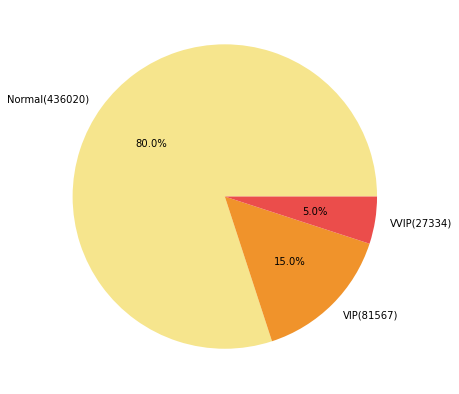

In [14]:
# 분포
plt.figure(figsize=(7,7),facecolor="white")
normal = df_n['push'].count()
vip = df_v['push'].count()
vvip = df_vv['push'].count()
labels = ['Normal'+'('+str(normal)+')','VIP'+'('+str(vip)+')','VVIP'+'('+str(vvip)+')']
plt.pie([normal,vip,vvip],labels=labels,autopct='%.1f%%',colors=['#f6e58d','#f0932b','#eb4d4b'])
plt.show()

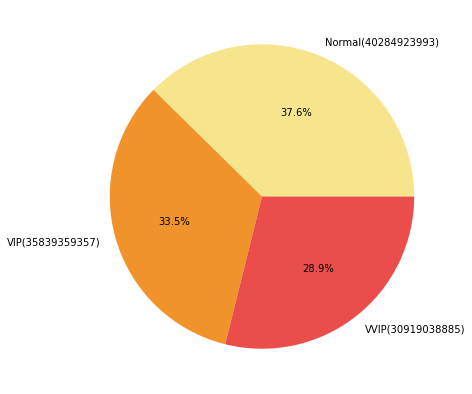

In [15]:
# 거래 금액
plt.figure(figsize=(7,7),facecolor="white")
normal = df_n['post'].sum()
vip = df_v['post'].sum()
vvip = df_vv['post'].sum()
labels = ['Normal'+'('+str(normal)+')','VIP'+'('+str(vip)+')','VVIP'+'('+str(vvip)+')']
plt.pie([normal,vip,vvip],labels=labels,autopct='%.1f%%',colors=['#f6e58d','#f0932b','#eb4d4b'])
plt.show()

**Analysis**
- VIP, VVIP들이 인원에 비해 상당히 많이 소비해준다 -> 파레토 전략이 유효할 것이다
- 물론 normal 고객들을 위한 전략도 필요

### 성별

In [16]:
def genders1(sub_loc,title,df2):
    plt.subplot(sub_loc)
    plt.title(title)
    man = df2[df2['man'].values==1]['man'].count()
    woman = df2[df2['man'].values!=1]['man'].count()
    labels = ['woman'+'('+str(woman)+')','man'+'('+str(man)+')']
    plt.pie(df2['man'].value_counts(),labels=labels,autopct='%.1f%%',colors=['#ff6b6b','#48dbfb'])

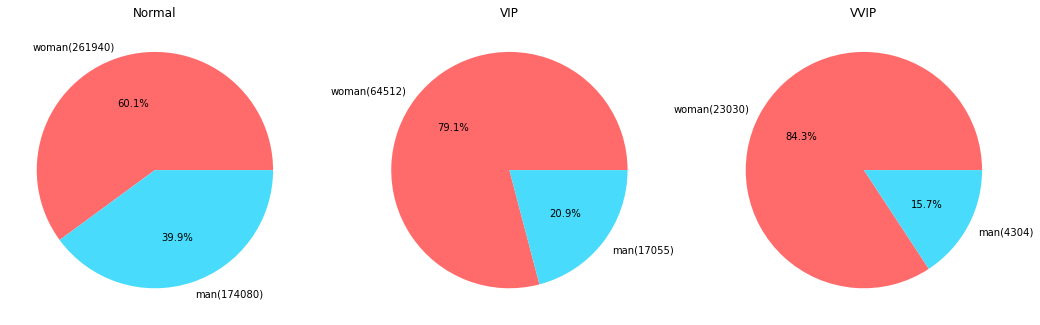

In [17]:
plt.figure(figsize=(18,6),facecolor="white")
genders1(131,'Normal',df_n)
genders1(132,'VIP',df_v)
genders1(133,'VVIP',df_vv)
plt.show()

In [18]:
def genders2(sub_loc1,sub_loc2,title,df2):
    limit_sum = max(df_n['post'].sum(),df_v['post'].sum(),df_vv['post'].sum())*0.8
    limit_avg = max(df_n['post'].mean(),df_v['post'].mean(),df_vv['post'].mean())*1.25
    plt.subplot(sub_loc1)
    a = df2.groupby('man').sum()['post'].reset_index()
    a.iloc[0,0] = 'woman'
    a.iloc[1,0] = 'man'
    plt.title(f'sum of purchases ({title})')
    plt.bar(a['man'],a['post'],color=['#ff6b6b','#48dbfb'])
    plt.ylim(0, limit_sum)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    b = df2.groupby('man').mean()['post'].reset_index()
    b.iloc[0,0] = 'woman'
    b.iloc[1,0] = 'man'
    plt.title(f'avg of purchases ({title})')
    plt.bar(b['man'],b['post'],color=['#ff6b6b','#48dbfb'])
    plt.ylim(0, limit_avg)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/2081745550.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/2081745550.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/2081745550.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/2081745550.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/2081745550.p

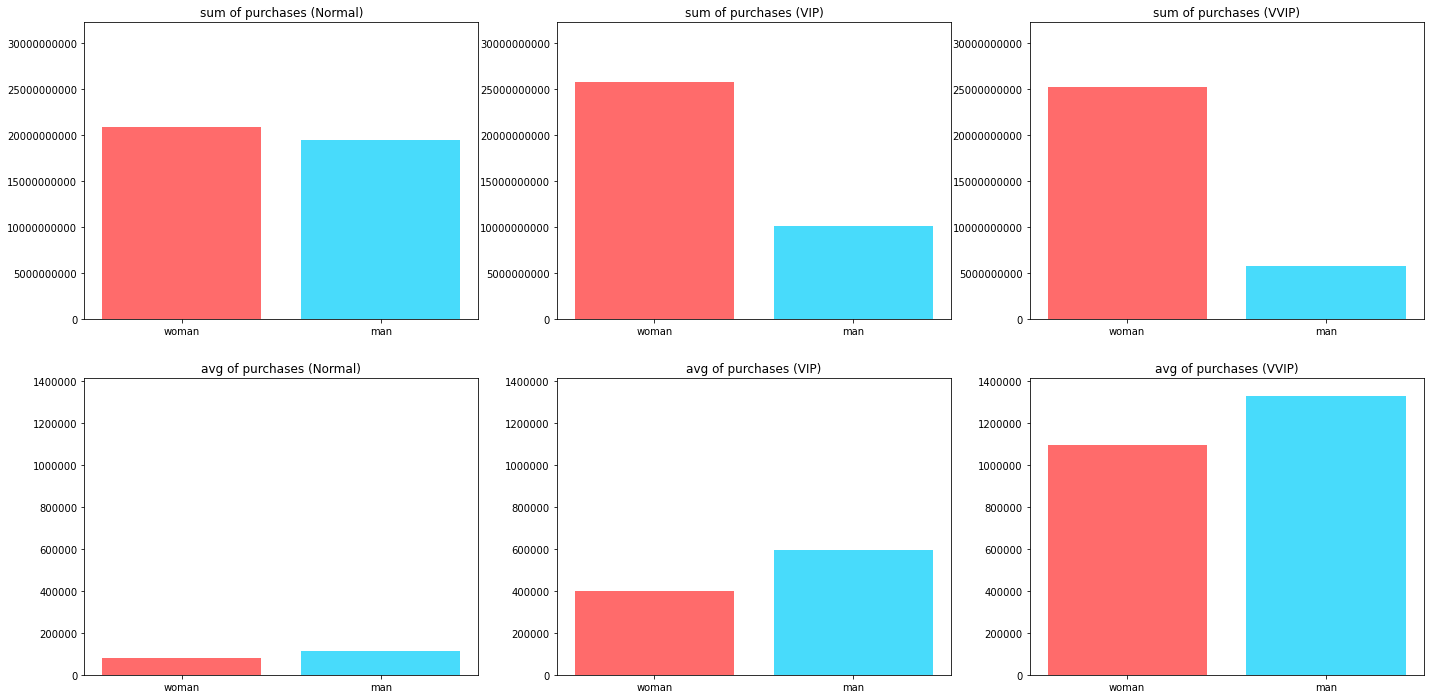

In [19]:
plt.figure(figsize=(24,12),facecolor="white")

genders2(231,234,'Normal',df_n)
genders2(232,235,'VIP',df_v)
genders2(233,236,'VVIP',df_vv)

plt.show()

### push 알림 설정 여부

In [20]:
def push1(sub_loc,title,df2):
    plt.subplot(sub_loc)
    plt.title(title)
    yes = df2[df2['push'].values==1]['push'].count()
    no = df2[df2['push'].values!=1]['push'].count()
    labels = ['No'+'('+str(no)+')','Yes'+'('+str(yes)+')']
    a = df2['push'].value_counts().sort_index()
    plt.pie(a,labels=labels,autopct='%.1f%%',colors=['#feca57','#54a0ff'])

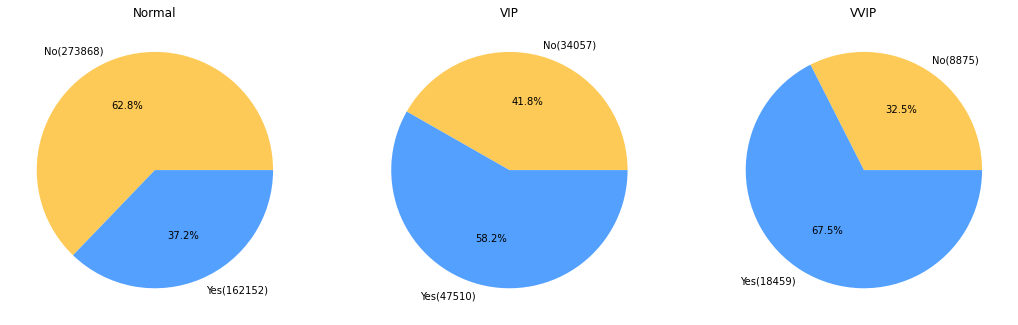

In [21]:
plt.figure(figsize=(18,6),facecolor="white")
push1(131,'Normal',df_n)
push1(132,'VIP',df_v)
push1(133,'VVIP',df_vv)
plt.show()

In [22]:
def push2(sub_loc1,sub_loc2,title,df2):
    limit_sum = max(df_n['post'].sum(),df_v['post'].sum(),df_vv['post'].sum()) * 0.8
    limit_avg = max(df_n['post'].mean(),df_v['post'].mean(),df_vv['post'].mean()) * 1.2
    plt.subplot(sub_loc1)
    a = df2.groupby('push').sum()['post'].sort_index().reset_index()
    a.iloc[0,0] = 'no'
    a.iloc[1,0] = 'yes'
    plt.title(f'sum of purchases({title})')
    plt.bar(a['push'],a['post'],color=['#feca57','#54a0ff'])
    plt.ylim(0, limit_sum)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    b = df2.groupby('push').mean()['post'].reset_index()
    b.iloc[0,0] = 'no'
    b.iloc[1,0] = 'yes'
    plt.title(f'avg of purchases({title})')
    plt.bar(b['push'],b['post'],color=['#feca57','#54a0ff'])
    plt.ylim(0, limit_avg)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/4267116985.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/4267116985.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/4267116985.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/4267116985.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/4267116985.p

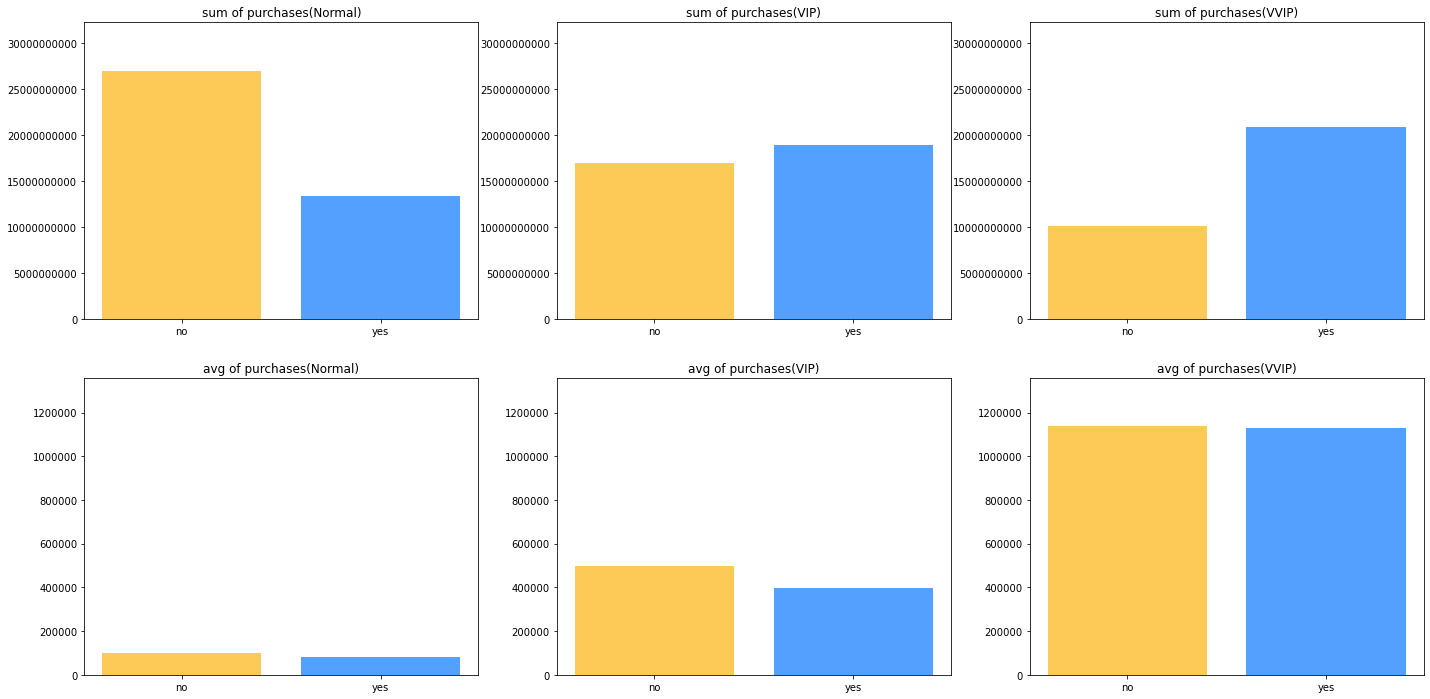

In [23]:
plt.figure(figsize=(24,12),facecolor="white")
push2(231,234,'Normal',df_n)
push2(232,235,'VIP',df_v)
push2(233,236,'VVIP',df_vv)
plt.show()

## 연령대별

/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

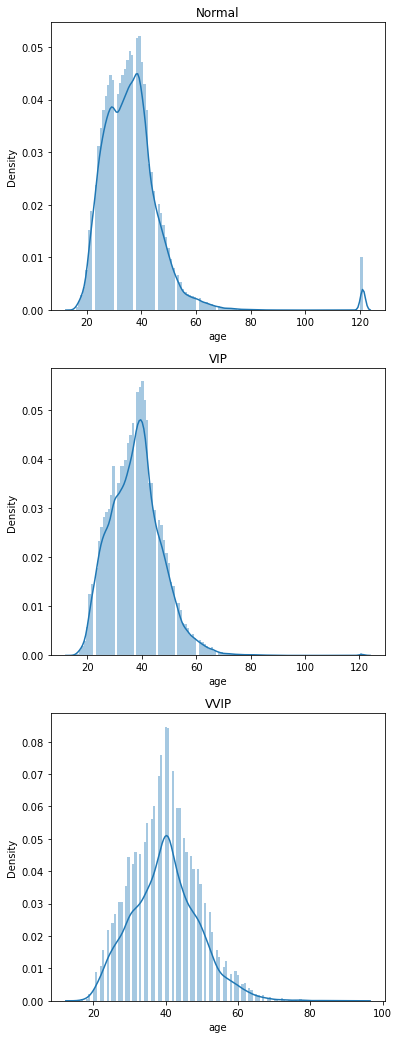

In [24]:
plt.figure(figsize=(6,18),facecolor='white')
plt.subplot(311)
plt.title('Normal')
sns.distplot(df_n['age'],bins=120)
plt.subplot(312)
plt.title('VIP')
sns.distplot(df_v['age'],bins=120)
plt.subplot(313)
plt.title('VVIP')
sns.distplot(df_vv['age'],bins=120)
plt.show()

In [25]:
def age1(sub_loc1,sub_loc2,title,df2):
    limit_sum = max(df_n['post'].sum(),df_v['post'].sum(),df_vv['post'].sum()) * 0.06
    limit_avg = max(df_n['post'].mean(),df_v['post'].mean(),df_vv['post'].mean()) * 4
    plt.subplot(sub_loc1)
    plt.title(f"sum of purchases({title})")
    plt.bar(df2.groupby('age').sum()['post'].index,df2.groupby('age').sum()['post'])
    plt.ylim(0, limit_sum)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    plt.title(f"avg of purchases({title})")
    plt.bar(df2.groupby('age').mean()['post'].index,df2.groupby('age').mean()['post'])
    plt.ylim(0, limit_avg)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/188262168.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/188262168.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/188262168.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/188262168.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/188262168.py:9: Us

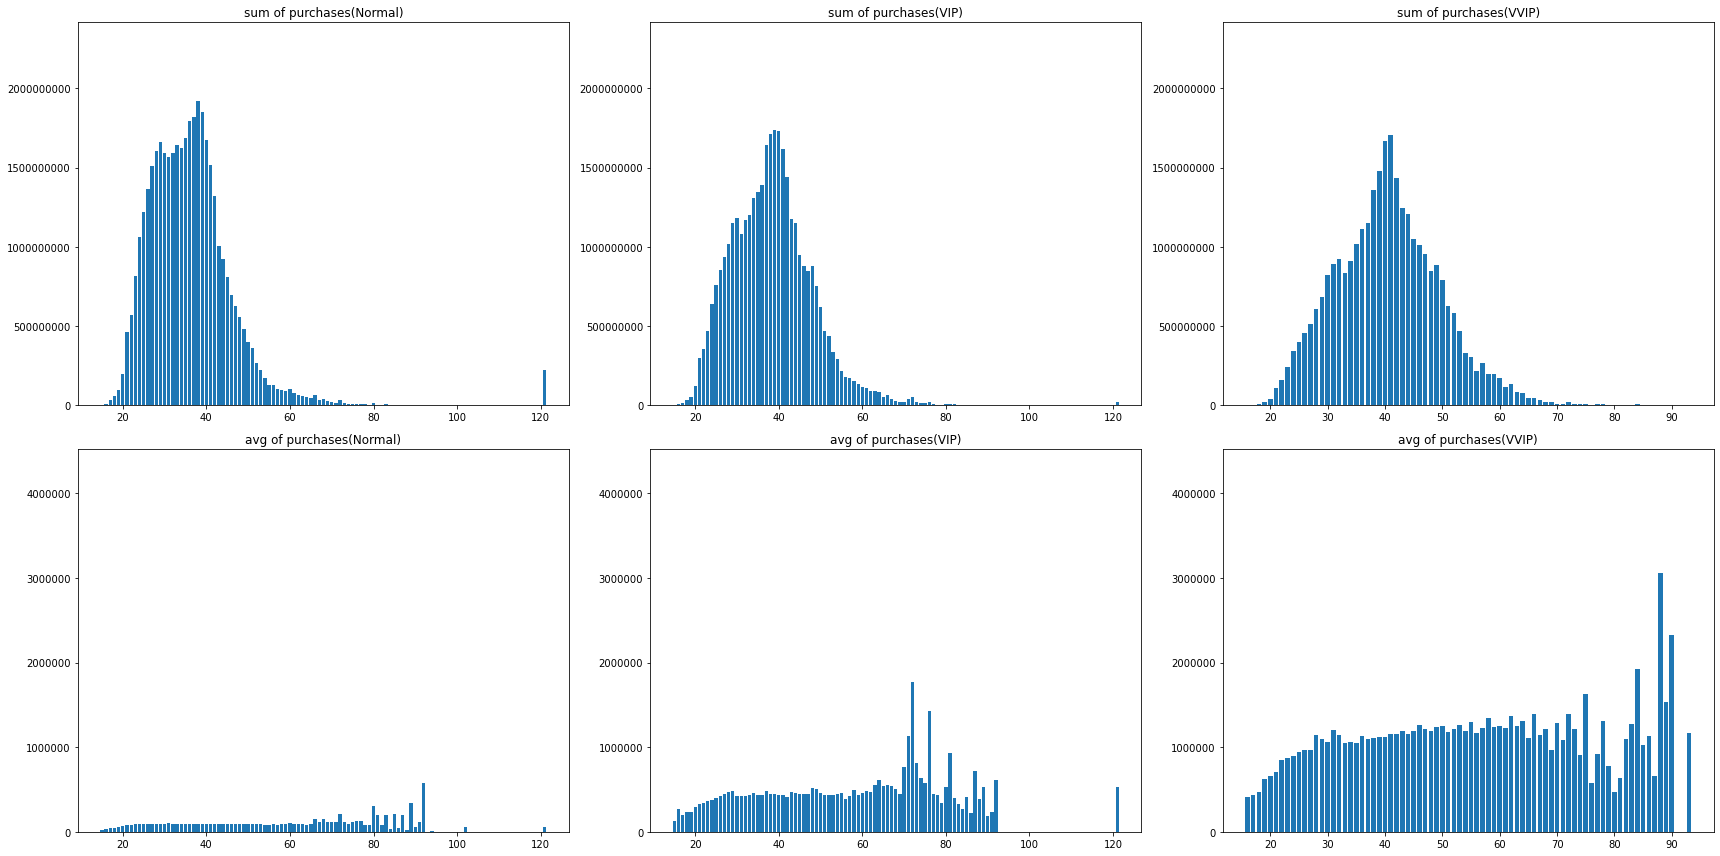

In [26]:
plt.figure(figsize=(24,12),facecolor="white")
age1(231,234,'Normal',df_n)
age1(232,235,'VIP',df_v)
age1(233,236,'VVIP',df_vv)

plt.tight_layout()
plt.show()

## 구매 횟수별 (once and more)

In [27]:
def cnt_b1(sub_loc,title,df2):
    plt.subplot(sub_loc)
    plt.title(title)
    labels = df2['cnt_b'].value_counts().index.to_list()
    plt.pie(df2['cnt_b'].value_counts(),labels=labels,autopct='%.1f%%')

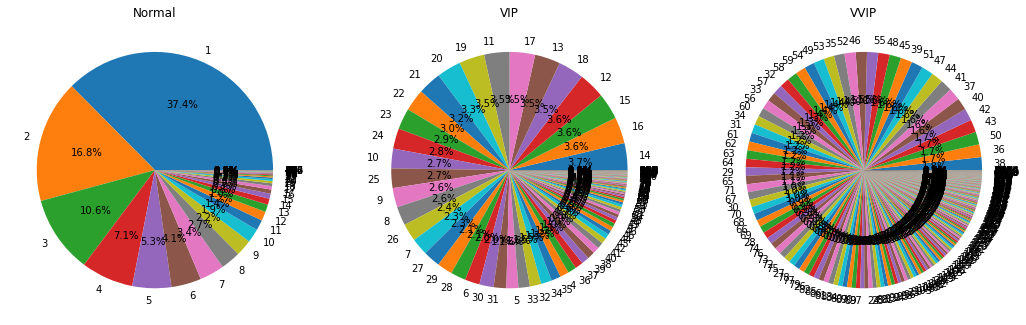

In [28]:
plt.figure(figsize=(18,6),facecolor="white")
cnt_b1(131,'Normal',df_n)
cnt_b1(132,'VIP',df_v)
cnt_b1(133,'VVIP',df_vv)
plt.show()

In [35]:
def cnt_b2(sub_loc1,sub_loc2,title,df2):
    limit_sum = max(df_n['post'].sum(),df_v['post'].sum(),df_vv['post'].sum()) * 0.15
    limit_avg = max(df_n['post'].mean(),df_v['post'].mean(),df_vv['post'].mean()) * 120
    plt.subplot(sub_loc1)
    a = df2.groupby('cnt_b').sum()['post'].reset_index()
    a.iloc[0,0] = 'no'
    a.iloc[1,0] = 'yes'
    plt.title(f'sum of purchases({title})')
    plt.bar(df2.groupby('cnt_b').sum()['post'].index,df2.groupby('cnt_b').sum()['post'])
    plt.ylim(0, limit_sum)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    b = df2.groupby('cnt_b').mean()['post'].reset_index()
    b.iloc[0,0] = 'no'
    b.iloc[1,0] = 'yes'
    plt.title(f'avg of purchases({title})')
    plt.bar(df2.groupby('cnt_b').mean()['post'].index,df2.groupby('cnt_b').mean()['post'])
    plt.ylim(0, limit_avg)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/2841798999.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/2841798999.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/2841798999.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/2841798999.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1830/2841798999.p

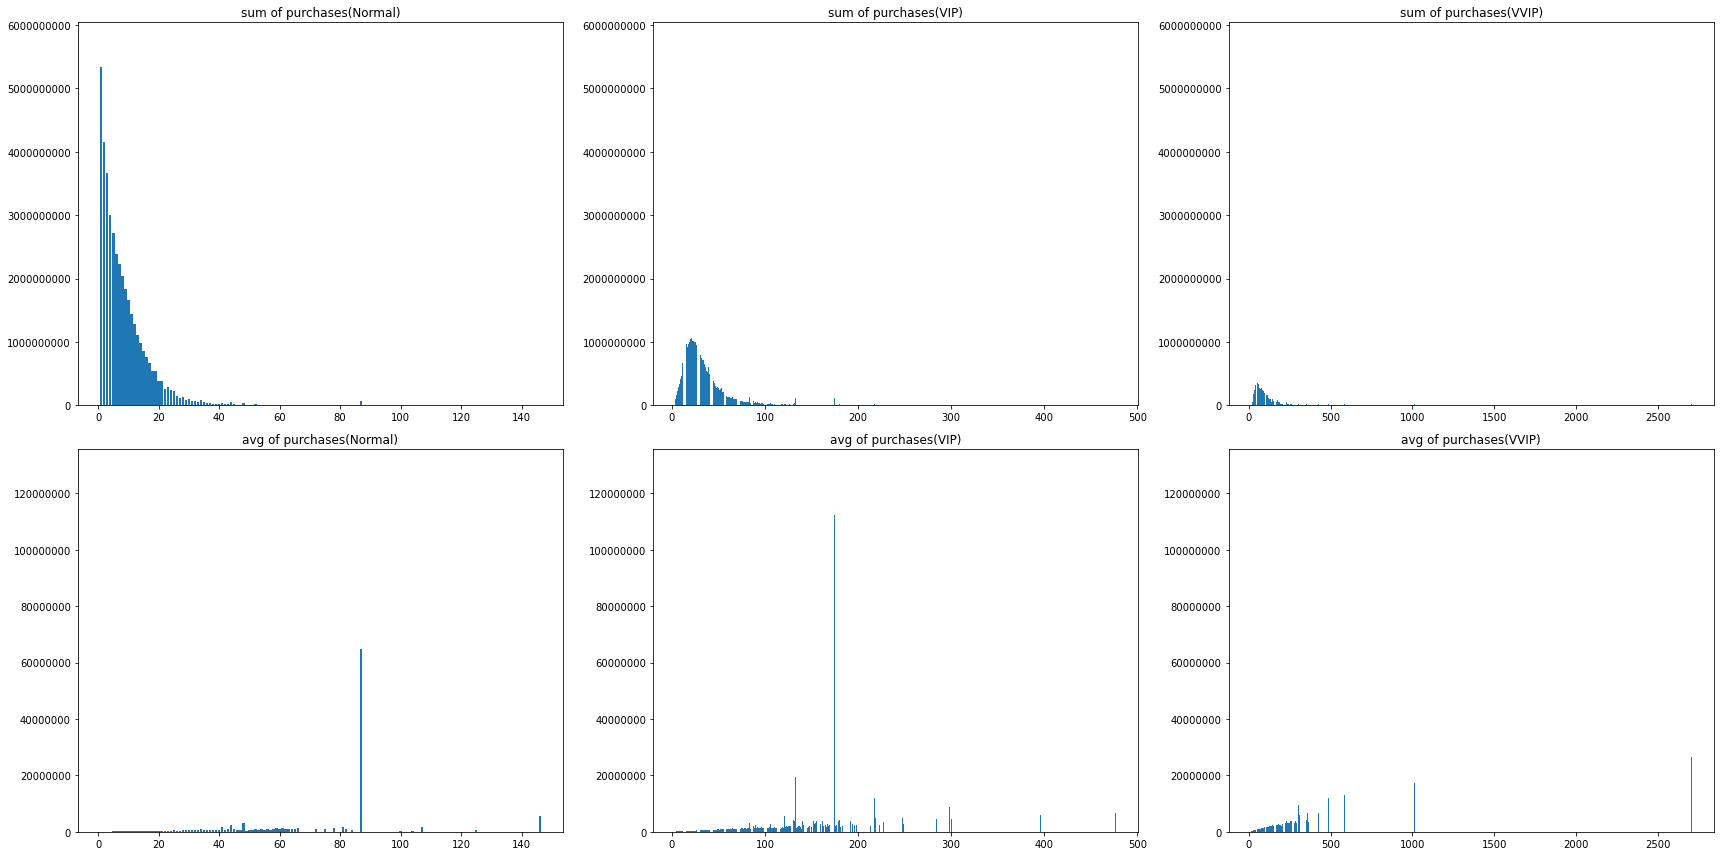

In [36]:
plt.figure(figsize=(24,12),facecolor="white")
cnt_b2(231,234,'Normal',df_n)
cnt_b2(232,235,'VIP',df_v)
cnt_b2(233,236,'VVIP',df_vv)

plt.tight_layout()
plt.show()

## 할인율

/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

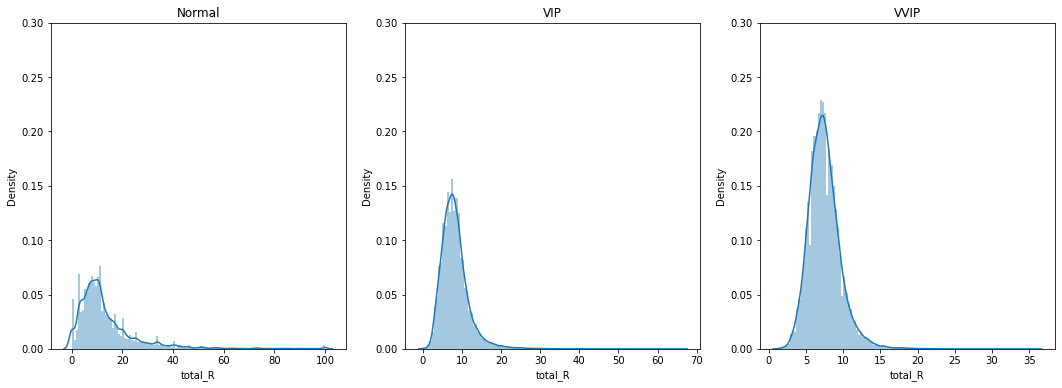

In [31]:
plt.figure(figsize=(18,6),facecolor='white')
plt.subplot(131)
plt.title('Normal')
sns.distplot(df_n['total_R'],bins=120)
plt.ylim(0,0.3)
plt.subplot(132)
plt.title('VIP')
sns.distplot(df_v['total_R'],bins=120)
plt.ylim(0,0.3)
plt.subplot(133)
plt.title('VVIP')
sns.distplot(df_vv['total_R'],bins=120)
plt.ylim(0,0.3)
plt.show()

In [32]:
def total_R1(sub_loc1,sub_loc2,title,df2):
    plt.subplot(sub_loc1)
    plt.title(f'sum of purchases({title})')
    a = df2.groupby('push').sum()['post'].reset_index()
    plt.bar(df2.groupby('total_R').sum()['post'].index,df2.groupby('total_R').sum()['post'])
    plt.ylim(0,2500000000)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    b = df2.groupby('push').mean()['post'].reset_index()
    plt.title(f'avg of purchases({title})')
    plt.bar(df2.groupby('total_R').mean()['post'].index,df2.groupby('total_R').mean()['post'])
    plt.ylim(0,10000000)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3949/2514274755.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3949/2514274755.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3949/2514274755.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3949/2514274755.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3949/2514274755.py:

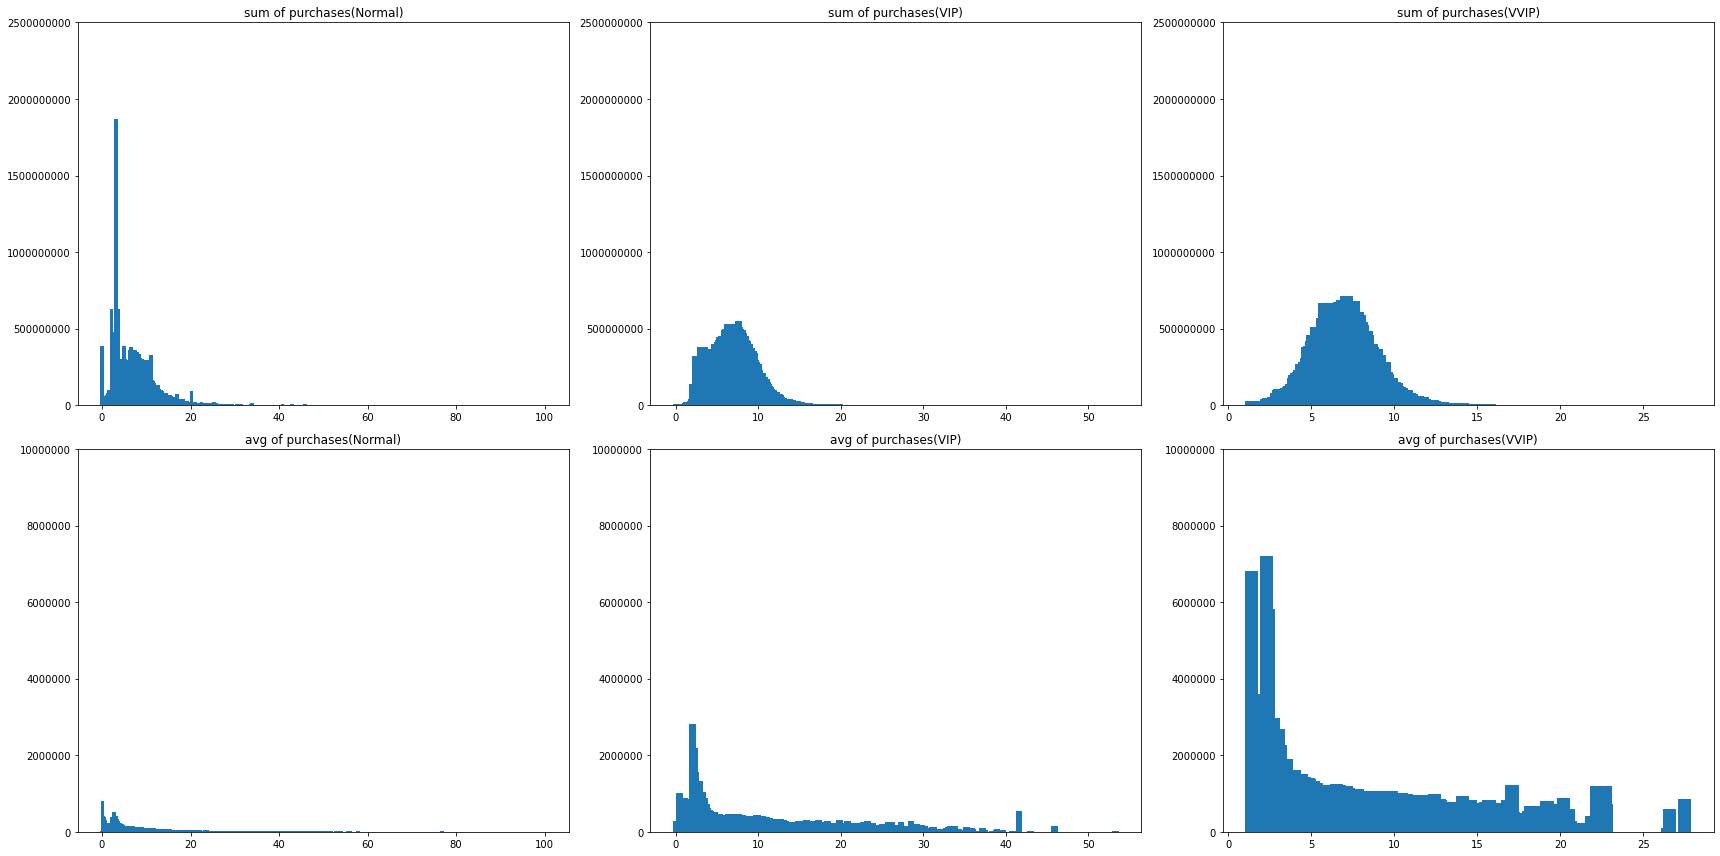

In [49]:
plt.figure(figsize=(24,12),facecolor="white")
total_R1(231,234,'Normal',df_n)
total_R1(232,235,'VIP',df_v)
total_R1(233,236,'VVIP',df_vv)

plt.tight_layout()
plt.show()

##

## 피드백
- 파레토에 좀 더 집중하는게 낫다

## 전략 (점수를 어떻게 쓸 것인가)
- 신규 유저
  - 군집 특성 -> VIP, VVIP와 Normal 간의 차이보고 특성 파악
  - 군집 파악해서 타겟 마케팅

- 기존 유저
  - 등급 올리기
  - Normal 고객 구매 유도
  - 
- 우리 데이터분석이 어떤 가치가 있는가 (어떻게 활용할 수 있는가)